In [1]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [15]:
def create_grammar(grammar_str,split='=>',line_split='\n'):
    grammar_dict={}
    grammar_list=grammar_str.split(line_split)
    
    for grammar in grammar_list:
        if not grammar: continue
        title,stmt=grammar.split(split)
        grammar_dict[title.strip()]=[value.split() for value in stmt.split('|')]
    return grammar_dict


In [16]:
grammar=create_grammar(adj_grammar)

In [17]:
grammar

{'Adj': [['蓝色的'], ['好看的'], ['小小的']], 'Adj*': [['null'], ['Adj', 'Adj*']]}

In [18]:
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""

In [20]:
grammar=create_grammar(human,split='=')

In [21]:
grammar

{'human': [['自己', '寻找', '活动']],
 '寻找': [['看看'], ['找找'], ['想找点']],
 '活动': [['乐子'], ['玩的']],
 '自己': [['我'], ['俺'], ['我们']]}

In [22]:
import random

In [31]:
choice=random.choice

def generate(grammar,target):
    if target not in grammar: return target
    expanded=[generate(grammar,t) for t in choice(grammar[target])]
    return ''.join([st if st!='/n' else '/n' for st in expanded if st!='null'])

In [55]:
generate(grammar,'human')

'俺找找乐子'

In [56]:
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

In [60]:
grammar_2=create_grammar(host,split='=')

In [61]:
grammar_2

{'host': [['寒暄', '报数', '询问', '业务相关', '结尾']],
 '业务相关': [['玩玩', '具体业务']],
 '人称': [['先生'], ['女士'], ['小朋友']],
 '具体业务': [['喝酒'], ['打牌'], ['打猎'], ['赌博']],
 '单个数字': [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']],
 '寒暄': [['称谓', '打招呼'], ['打招呼']],
 '打招呼': [['你好'], ['您好']],
 '报数': [['我是', '数字', '号', ',']],
 '数字': [['单个数字'], ['数字', '单个数字']],
 '玩玩': [['耍一耍'], ['玩一玩']],
 '称谓': [['人称', ',']],
 '结尾': [['吗？']],
 '询问': [['请问你要'], ['您需要']]}

In [77]:
generate(grammar_2,'host')

'您好我是175号,您需要耍一耍打牌吗？'

In [81]:
import random
import pandas as pd

In [82]:
filename='C:/Users/zuoti/movie_comments.csv'

In [110]:
content=pd.read_csv(filename,encoding='utf8')

C:\Users\zuoti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
content.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [100]:
articles=content['comment'].tolist()

In [87]:
len(articles)

261497

In [88]:
import re

In [101]:
def token(string):
    return re.findall('\w+',string)

In [93]:
''.join(token(articles[5]))

'犯我中华者虽远必诛吴京比这句话还要意淫一百倍'

In [95]:
articles_list=[''.join(token(str(string))) for string in articles]

In [96]:
len(articles_list)

261497

In [111]:
with open('article_26+k.txt','w',encoding='utf8') as f:
    for a in articles_list:
        
            f.write(a+'\n')

In [113]:
! pip install jieba

  Stored in directory: C:\Users\zuoti\AppData\Local\pip\Cache\wheels\c9\c7\63\a9ec0322ccc7c365fd51e475942a82395807186e94f0522243
Successfully built jieba


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [114]:
import jieba

In [115]:
def cut(string):
    return list(jieba.cut(string))

In [117]:
Token=[]
for i,line in enumerate(articles_list):
    if i%1000==0: print(i)
    if i>20000: break
    Token+=cut(line)

Building prefix dict from the default dictionary ...


0


Dumping model to file cache C:\Users\zuoti\AppData\Local\Temp\jieba.cache
Loading model cost 1.246 seconds.
Prefix dict has been built succesfully.


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


In [118]:
from collections import Counter

In [119]:
words_count=Counter(Token)

In [121]:
words_count.most_common(10)

[('的', 30780),
 ('了', 10486),
 ('是', 7196),
 ('我', 5268),
 ('都', 3939),
 ('和', 3258),
 ('电影', 3250),
 ('也', 3164),
 ('在', 3143),
 ('看', 3124)]

In [122]:
frequenices=[f for w,f in words_count.most_common(100)]

In [123]:
x=[i for i in range(100)]

In [124]:
%matplotlib inline

In [125]:
import matplotlib.pyplot as plt

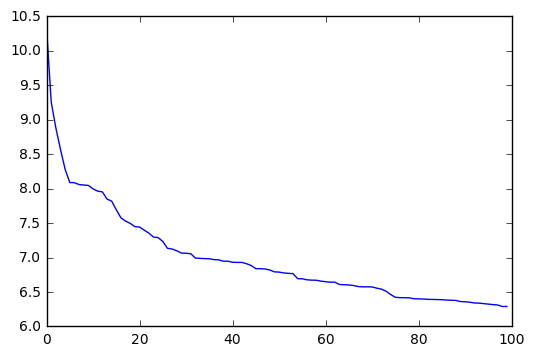

In [129]:
import numpy as np
plt.plot(x,np.log(frequenices))

In [130]:
def prob_1(word):
    return words_count[word]/len(Token)

In [131]:
prob_1('你好')

2.4444390123577504e-05

In [133]:
Token_2_gram=[''.join(Token[i:i+2]) for i in range(len(Token[:-2]))]

In [134]:
Token_2_gram[:10]

['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']

In [136]:
words_count_2 = Counter(Token_2_gram)

In [140]:
def prob_2(word1,word2):
    if word1+word2 in words_count_2: return words_count_2[word1+word2]/len(Token_2_gram)
    else:
        return 1/len(Token_2_gram)

In [142]:
prob_2('我们', '在')

2.222227160504801e-05

In [143]:
def get_probablity(sentence):
    words=cut(sentence)
    sentence_pro=1
    for i,word in enumerate(words[:-1]):
        next_=words[i+1]
        probality=prob_2(word,next_)
        sentence_pro*=probality
    return sentence_pro
        

In [144]:
get_probablity('小明今天抽奖抽到一台苹果手机')

1.2042889679187418e-34

In [145]:
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""

In [152]:
for sen in [generate(grammar=create_grammar(human,split='='),target='human') for i in range(10)]:
    print('sentence: {} with Pro: {}'.format(sen,get_probablity(sen)))

sentence: 我找找乐子 with Pro: 2.1948020119534626e-17
sentence: 俺找找玩的 with Pro: 1.073016701436585e-21
sentence: 我们想找点玩的 with Pro: 4.8773486428935675e-23
sentence: 俺找找乐子 with Pro: 2.1948020119534626e-17
sentence: 我看看玩的 with Pro: 2.414282213148809e-16
sentence: 我们找找乐子 with Pro: 2.1948020119534626e-17
sentence: 我找找玩的 with Pro: 1.073016701436585e-21
sentence: 俺看看玩的 with Pro: 2.414282213148809e-16
sentence: 我们看看玩的 with Pro: 2.414282213148809e-16
sentence: 我们找找玩的 with Pro: 1.073016701436585e-21
